IMPORTING LIBRARIES:

In [2]:
import pandas as pd, os, matplotlib.pyplot as plt,numpy as np, math
from pandas.tseries.offsets import DateOffset
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

IMPORTING AND PROCESSING DATASET:

In [3]:
m=pd.read_csv("msft.csv")
m['date']=pd.to_datetime(m['date'], format='%d-%m-%Y')
m.set_index(m['date'],inplace=True)
m.drop(columns=['date'],inplace=True)
m.sort_index(inplace=True)

SUBSETTING LAST 2 YEAR MSFT CLOSING PRICES:

In [4]:
sub=m.loc[m.iloc[-1].name+DateOffset(years=-2):].close

SPLITTING THE 2 YEAR DATA INTO TESTING AND TRAINING SETS TO TEST THE ACCURACY OF ARIMA FORECAST:

TRAINING SET CONTAINS 75% OF THE DATA FROM THE 2-YEAR SUBSET. TESTING SET CONTAINS THE REMAINING DATA.

In [5]:
train=sub.head(math.ceil(len(sub)*0.75))
test=sub.drop(train.index)

RUNNING ARIMA MODEL ON THE TRAINING SUBSET TO DETERMINE THE P,D,Q PARAMETERS. 

THE auto_arima FUNCTION AUTOMATICALLY ITERATES THROUGH MULTIPLE COMBINATIONS OF PARAMETERS AND SELECTS THE ONE WITH THE MINIMUM AIC SCORE

In [6]:
model = auto_arima(train, trace = True, error_action = 'ignore', suppress_warnings = True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2126.720, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2161.731, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2123.633, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2130.098, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2161.040, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2125.095, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2125.262, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2126.535, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2124.137, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.539 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  380
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1058.816
Date:                Tue, 16 Nov 2021   AIC                           2123.633
Time:                        18:56:06   BIC                           2135.446
Sample:                             0   HQIC                          2128.321
                                - 380                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3224      0.208      1.553      0.120      -0.084       0.729
ar.L1         -0.3164      0.030    -10.609      0.000      -0.375      -0.258
sigma2        15.6308      0.746     20.943      0.000      14.168      17.094
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               163.64
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.46
Prob(H) (two-sided):                  0.37   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

PREDICTING THE VALUES FOR COMPARISON WITH TESTING SET :

In [8]:
test_set_prediction = model.predict(n_periods = len(test))
test_set_prediction = pd.DataFrame(test_set_prediction, index=sub.index[len(train):len(train)+len(test)], columns = ['Prediction'])

VISUAL COMPARISON OF PREDICTION RESULTS AND ACTUAL DATA FROM THE TESTING SET:

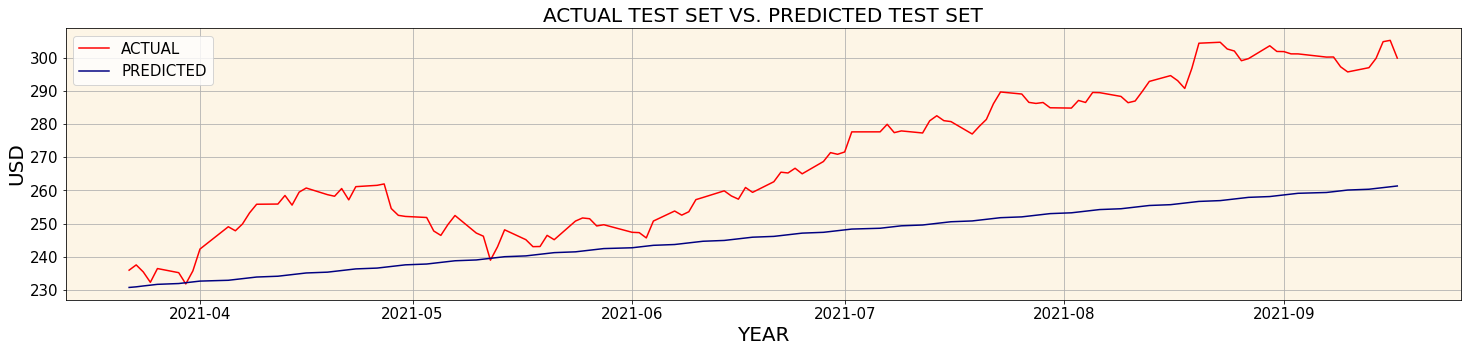

In [10]:
fig, ax=plt.subplots(figsize=(25,5))
ax.plot(test,'red')
ax.plot(test_set_prediction,'navy')
ax.set_xlabel('YEAR',fontdict={'fontsize':20})
ax.set_ylabel('USD',fontdict={'fontsize':20})
ax.tick_params(axis='both', labelsize=15)
ax.legend(['ACTUAL','PREDICTED'], fontsize=15)
ax.set_facecolor('oldlace')
ax.set_title('ACTUAL TEST SET VS. PREDICTED TEST SET',fontdict={'fontsize':20})
ax.tick_params(axis='both', labelsize=15)
ax.grid()

FROM THE ABOVE VISUALIZATION, IT CAN BE OBSERVED THAT THE PREDICTION MADE BY THE ARIMA MODEL (BLUE LINE) ROUGHLY FOLLOWS THE ACTUAL TREND IN THE MSFT CLOSE PRICES (RED TRENDLINE). HENCE, WE CAN CONCLUDE THAT THE ARIMA MODEL FITTED USING THE TESTING DATA SERVES AS A FEASIBLE METHOD TO FORECAST THE MSFT STOCK PRICES. 

FUTURE STOCK PRICE PREDICTION:

NOW WE USE THE SAME ARIMA MODEL (1,1,0) TO PREDICT THE MSFT CLOSING STOCK PRICE FOR 30 DAYS INTO THE FUTURE.
FIRSTLY, WE WILL FIT THE SAME MODEL TO THE TWO YEAR SUBSET. AFTER THIS, WE WILL STORE THE PREDICTED VALUES INTO A DATAFRAME CALLED FINAL.

In [12]:
prediction_model=model.fit(sub)
final=prediction_model.predict(n_periods=30)
final=pd.DataFrame(final, index=pd.date_range(start=m.iloc[-1].name+DateOffset(days=1), periods=30), columns=['close'])

VISUALIZING THE PREDICTION MADE BY THE ARIMA MODEL:

PREDICTED MSFT CLOSE PRICES


                  close
2021-09-18  301.694496
2021-09-19  301.620976
2021-09-20  302.049579
2021-09-21  302.345346
2021-09-22  302.676254
2021-09-23  302.997865
2021-09-24  303.321936
2021-09-25  303.645356
2021-09-26  303.968949
2021-09-27  304.292495
2021-09-28  304.616054
2021-09-29  304.939610
2021-09-30  305.263166
2021-10-01  305.586723
2021-10-02  305.910279
2021-10-03  306.233835
2021-10-04  306.557392
2021-10-05  306.880948
2021-10-06  307.204504
2021-10-07  307.528061
2021-10-08  307.851617
2021-10-09  308.175173
2021-10-10  308.498730
2021-10-11  308.822286
2021-10-12  309.145842
2021-10-13  309.469399
2021-10-14  309.792955
2021-10-15  310.116511
2021-10-16  310.440068
2021-10-17  310.763624 





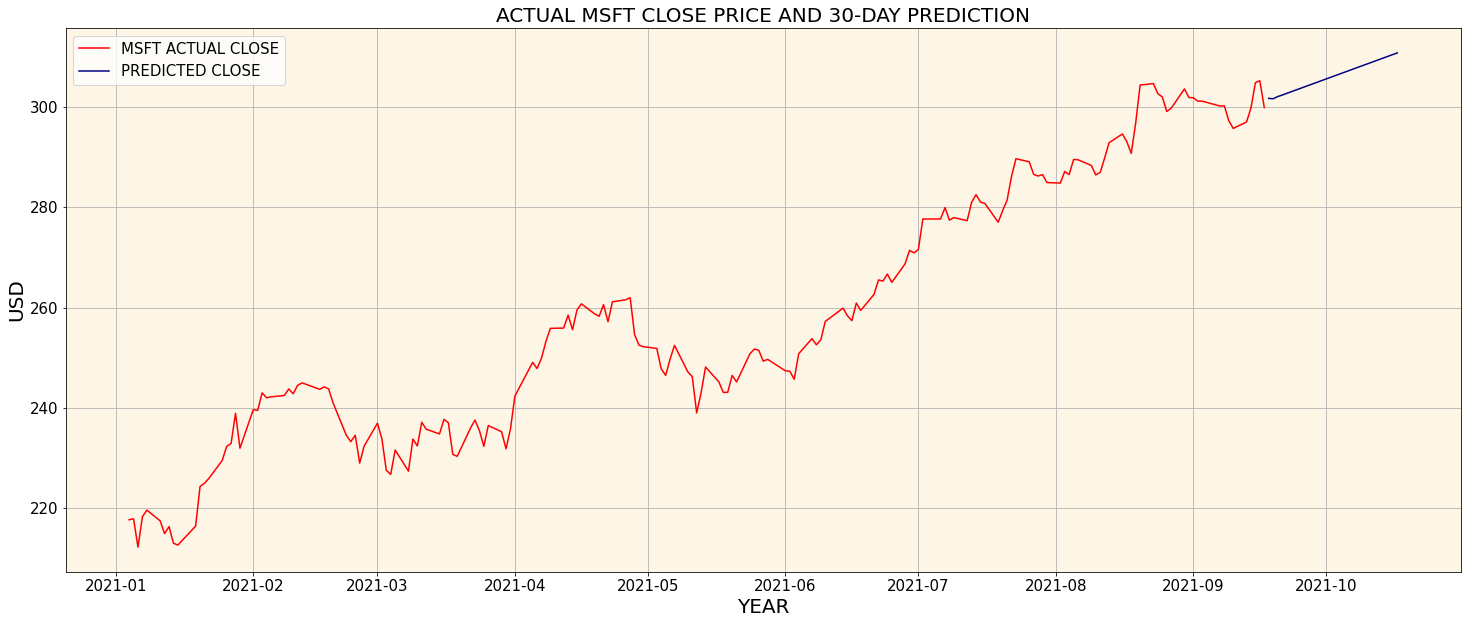

In [13]:
fig, ax=plt.subplots(figsize=(25,10))
ax.plot(sub.loc['2021':],'red')
ax.plot(final,'navy')
ax.set_xlabel('YEAR',fontdict={'fontsize':20})
ax.set_ylabel('USD',fontdict={'fontsize':20})
ax.tick_params(axis='both', labelsize=15)
ax.legend(['MSFT ACTUAL CLOSE','PREDICTED CLOSE'], fontsize=15)
ax.set_facecolor('oldlace')
ax.set_title('ACTUAL MSFT CLOSE PRICE AND 30-DAY PREDICTION',fontdict={'fontsize':20})
ax.grid()
print("PREDICTED MSFT CLOSE PRICES\n\n\n",final,"\n\n\n")

THE PREDICTED CLOSE PRICE VALUES ARE AS GIVEN ABOVE. FROM THE VISUALIZATION, WE OBSERVE THAT THE BLUE LINE REPRESENTING THE FUTURE PREDICTION FOLLOWS THE GENERAL UPWARD TREND IN THE HISTORICAL DATA.

CONCLUSION:

THE ABOVE ANALYSIS HAS TESTED THE FEASIBILITY OF THE ARIMA TIME SERIES MODEL USING MSFT HISTORICAL STOCK PRICE DATA OVER A 2 YEAR PERIOD. THIS MODEL WAS THEN USED TO FORECAST THE STOCK PRICE 30 DAYS INTO THE FUTURE. HOWEVER, IT CAN BE OBSERVED FROM BOTH THE VISUALIZATIONS THAT THE RESULTS FROM THE ARIMA MODEL DO NOT EXACTLY RELFECT THE MINUTE FLUCTUATIONS IN THE ACTUAL STOCK PRICE DATA. THIS IS BECAUSE STOCK PRICES ARE DEPENDENT ON A MULTITUDE OF UNPREDICTABLE FACTORS, BOTH INTERNAL AND EXTRNAL, WHICH MAKES THEIR MOVEMENT VERY VOLATILE. KEEPING IN MIND THAT THE ARIMA MODEL ONLY TAKES INTO CONSIDERATION PREVIOUS VALUES AND ERRORS, THE PREDICTIONS MAY NOT ALWAYS EXACTLY MIRROR REAL WORLD STOCK PRICES.